In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import init_simple_mdp as imdp
import numpy as np
import seaborn as sns
from matplotlib import cm, colors

In [2]:
def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = colors.rgb2hex(rgb)
    return color

In [22]:
df = pd.read_csv('player10_results.csv')
df = df[['epsilon','tokens','score','optimal_value','optimal_policy']]

# Map to policy action names 
a_map = {i:imdp.a_list[i] for i in range(len(imdp.a_list))}
df['optimal_policy_name'] = df['optimal_policy'].map(a_map)

In [6]:
epsilon_list = list(df.epsilon.unique())
epsilon_list = list(range(1,11))

In [7]:
df0 = df.loc[df.tokens==0].copy()

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for epsilon in range(1,11):
    
    temp = df0.loc[df0.epsilon==epsilon].set_index('score')['optimal_value'].copy()
    epsilon_dfs.append(temp)


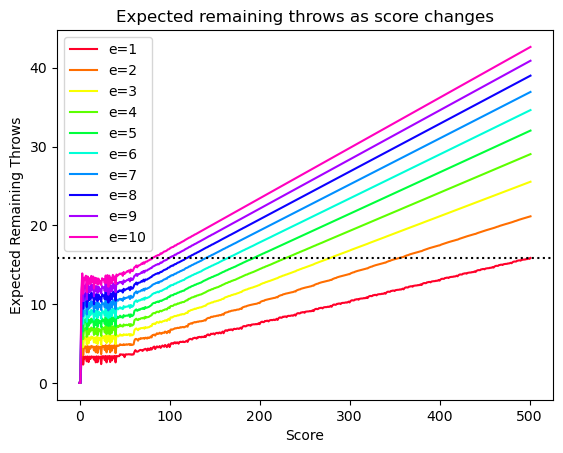

In [10]:
e_leg = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

# Plot each token line 
for epsilon in range(10):
    e_leg.append('e={}'.format(epsilon+1))
    color = color_map_color(epsilon+1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    fig = plt.plot(epsilon_dfs[epsilon],color=color)

fig = plt.legend(e_leg) 
fig = plt.title('Expected remaining throws as score changes')
fig = plt.xlabel('Score')
fig = plt.axhline(epsilon_dfs[0][501],color='black',linestyle='dotted') 
fig = plt.ylabel('Expected Remaining Throws')
fig = plt.legend(e_leg)

In [14]:
token_list = list(range(10))

In [30]:
df1 = df.loc[df.epsilon==1].copy()

# Create dataframes for values at 501 for each token value 
token_dfs = []

for token in range(0,10):
    
    temp = df1.loc[df1.tokens==token].set_index('score')['optimal_value'].copy()
    token_dfs.append(temp)


In [42]:
df5 = df.loc[df.epsilon==5].copy()

# Create dataframes for values at 501 for each token value 
e5_token_dfs = []

for token in range(0,10):
    
    temp = df5.loc[df5.tokens==token].set_index('score')['optimal_value'].copy()
    e5_token_dfs.append(temp)

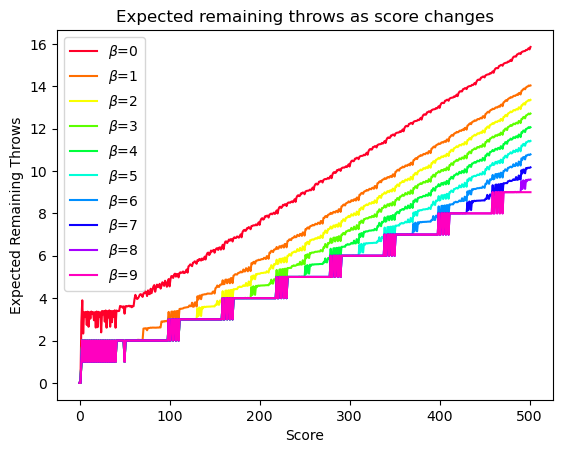

In [41]:
t_leg = []
vmax=max(token_list)
vmin=min(token_list)

# Plot each token line 
for beta in range(10):
    t_leg.append(r'$\beta$={}'.format(beta))
    color = color_map_color(beta, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    fig = plt.plot(token_dfs[beta][:],color=color)

fig = plt.legend(t_leg) 
fig = plt.title('Expected remaining throws as score changes')
fig = plt.xlabel('Score')
#fig = plt.axhline(token_dfs[0][501],color='black',linestyle='dotted') 
fig = plt.ylabel('Expected Remaining Throws')

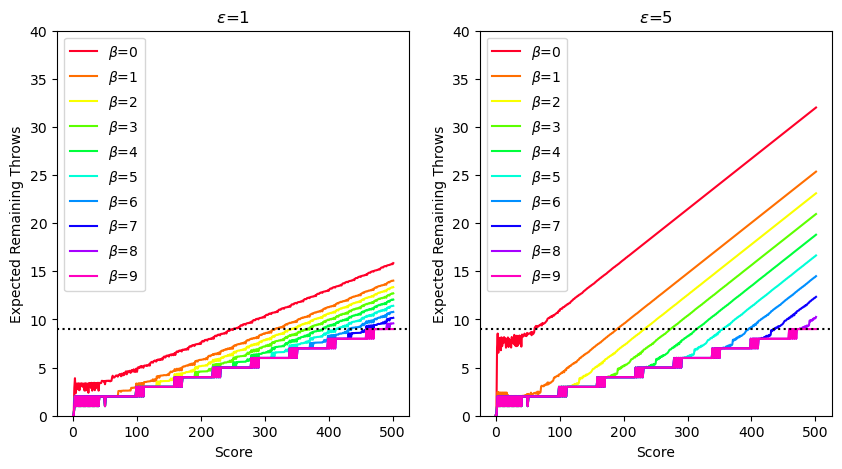

In [52]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))

t_leg = []
vmax=max(token_list)
vmin=min(token_list)

# Plot each token line 
for beta in range(10):
    t_leg.append(r'$\beta$={}'.format(beta))
    color = color_map_color(beta, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    fig = ax[0].plot(token_dfs[beta][:],color=color)

fig = ax[0].legend(t_leg) 
fig = ax[0].set_title('$\epsilon$=1')
fig = ax[0].set_xlabel('Score')
fig = ax[0].set_ylabel('Expected Remaining Throws')
fig = ax[0].set_ylim([0,40])
fig = ax[0].axhline(9,color='black',linestyle='dotted')

# Plot each token line 
for beta in range(10):
    t_leg.append(r'$\beta$={}'.format(beta))
    color = color_map_color(beta, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    fig = ax[1].plot(e5_token_dfs[beta][:],color=color)

fig = ax[1].legend(t_leg) 
fig = ax[1].set_title('$\epsilon$=5')
fig = ax[1].set_xlabel('Score')
fig = ax[1].set_ylabel('Expected Remaining Throws')
fig = ax[1].set_ylim([0,40])
fig = ax[1].axhline(9,color='black',linestyle='dotted')




In [50]:
e5_token_dfs[9]

score
0      0.0
1      0.0
2      1.0
3      2.0
4      1.0
      ... 
497    9.0
498    9.0
499    9.0
500    9.0
501    9.0
Name: optimal_value, Length: 502, dtype: float64